<h4 style="text-align:right">The Course of Computational Physics,&nbsp; Peking University</h4>
***
<p><br>
<h1 style="text-align:center"><font face="宋体" size=6>计算物理学三次作业</font></h1>
<br></p>
<h2 style="text-align:center"><font face="楷体">姓名:&nbsp;贺鑫</font> </h2>
<h2 style="text-align:center"> <font face="楷体">学号:&nbsp; _1500011805_</font></h2>

## 1 Householder 与 Givens 在QR算法中的比较

> 本题中我们试图比较一下利用 Householder 方法和 Givens 转动在进行矩阵的 QR 分解方面的有效性。为此我们考虑一个任意的矩阵$A\in\mathbb{R^{n\times n}}$，我们希望运用两种方法进行其 QR 分解——即寻找一个正交矩阵 $Q$ 和一个上三角矩阵 $R$ 使得 $A=QR$。  

>a) 对于一个任意的(即一般不是稀疏的)矩阵$A\in\mathbb{R^{n\times n}}$，对于$n\gg 1$，利用Householder 和 Givens 各分别需要多少次的计算才能获得其 QR分解(只需要给出领头阶的贡献)?  

>b) 写一个程序，利用 Householder 变换求出任意一个实矩阵的 QR 分解。输入:矩阵 A(以及它的大小 n),输出相应的矩阵 Q 和 R。  

>c) 同上问,只不过利用 Givens 转动。  

>d) 为了实际测试两种方法的运行速度,请随机产生 20 个 $6\times6$ 的随机矩阵,它们的矩阵元可以取为在 $(−1,+1)$ 之间均匀分布的实数,将这些矩阵喂给上面你写的程序,给出两种方法获得的时间,列表比较一下哪个方法更快。

> a) solution  
首先来看Householder约化，思想是:  
$$\textbf{v}=\textbf{x}-\|\textbf{x}\|\textbf{e}_k$$
$$Q=I-2\textbf{vv}^T/\|\textbf{v}\|^2$$
$$Q\textbf{x}=x_k\textbf{e}_k$$
对于第k次构造Householder矩阵满足形式，以保证前 $k-1$ 列已经上三角化的形式不变：
$$Q'_k=\begin{pmatrix}
I_{k-1} & 0 \\
0 & Q_k \\
\end{pmatrix}$$
在Householder约化的过程中，需要计算$n-1$个正交矩阵的乘积，一般矩阵乘法复杂度是$O(n^3)$；不过在考虑unblocked的过程，这个复杂度可以被简化(参考了 Robert A. van de Geijn的讲义分析过程 [http://www.cs.utesas.edu/users/rvdg/books/HQR.pdf] )：  
$$\begin{pmatrix}
U_{00} & r_{01} & R_{01} \\
0 & \alpha_{11} & a^{T}_{12} \\
0 & a_{21} & A_{22}
\end{pmatrix}
$$
note that:
$$
[\begin{pmatrix}\rho_{11}\\u_{21}\end{pmatrix},\tau_1]:=Housev[\begin{pmatrix}\alpha_{11}\\a_{21}\end{pmatrix}]
,\,x:=\begin{pmatrix}\alpha_{11}\\a_{21}\end{pmatrix}\\
\text{where:  }v=\begin{pmatrix}\alpha_{11}-\|x\|_2\\a_{21}\end{pmatrix},\,u=v/\|v\|_2,\,\tau_1=u^Tu/2,\,u_{21}:=u[2:]\\
\begin{pmatrix}\rho_{11}&a^{T}_{12}\\
0 & A_{22}\end{pmatrix}
:=\Big(I-\frac{1}{\tau_1}\begin{pmatrix}1\\u_{21}\end{pmatrix}\begin{pmatrix}1 & u_{21}\end{pmatrix}\Big)
\begin{pmatrix}\alpha_{11} & a^{T}_{12}\\ a_{21} & A_{22}\end{pmatrix}\,\,\,\,\text{with update by:}\\
\omega^{T}_{12}=(a^T_{12}+u^T_{21}A_{22})/\tau_1\\
\begin{pmatrix}a^T_{12}\\A_{22}\end{pmatrix}
=\begin{pmatrix}a^T_{12}-\omega^T_{12}\\A_{22}-u_{21}\omega^T_{12}\end{pmatrix}
$$
考虑到$A$的更新：第k次最重要的计算量的贡献在于$u^T_{21}A_{22}$的计算上，需要$4(m-k)(n-k)$次的浮点运算(而$m=n$)，所以计算量估算为：
$$N=\sum_{k=0}^{n-1} 4(n-k)^2=4\sum_{j=0}^{n-1}j^2\approx4\int_0^nx^2dx\sim O(\frac{4}{3}n^3)$$
不过在程序的具体实现中，还是使用了直接numpt.dot的功能(这样的话，复杂度会被提升到$O(n^4)$)


>接着看Givens转动：  
需要计算$n(n-1)/2$个正交矩阵的连乘积，而矩阵的乘法复杂度是$O(n^3)$，考虑到Givens矩阵的特殊性，每轮Givens矩阵的计算与Q,R的更新，需要$8n+4$次乘除法和$4n+1$次加减法以及$1$次开平方，(因为$I$与$G$只有4个元素的差别，因而可以大大简化了矩阵乘法的复杂度，详细分析也可以参看(c)的注释)。  
综上Givens转动的复杂度也可以达到：  
$$n(n-1)/2\times(12n+6)\sim O(6n^3)\sim(n^3)$$
值得一提的是，虽然分析上可以将关于Givens矩阵的乘法手动化成order(n)的复杂度，但这样却并没有比直接使用numpy.dot要快(理论上是$O(n^5)$，但$G$中包含大量0的运算，有关0的运算应该会很快？)，此外更可能与语言底层有很大的关系。在myQR中，提供了两种方式各自的实现。比较的结果是：在n较小的时候，myQR.QR_givens()使用了numpy会快一点(比如n=100)，不过n较大时使用简化矩阵乘法的myQR.QR_givens_my()会更快一点(比如n=200)，读者可以自行验证。

> b) solution  


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# the input information: matrix A can be arbitrary, for comparing between HQR and GQR, we fix A as below:
n=6
A=np.ones((n,n))
for i in range(n):
    A[i,i]=i+1;A[i,(i+1)%n]=i+2
# end input information
def norm(v):
    # need k multiplication, k-1 addtion, 1 sqrt, (k=len(v))
    return np.sqrt(np.dot(v,v))

Qfull=np.eye(n)
R=A.copy()
for i in range(n-1):
    v=R[i:,i].copy()
    nm_x=norm(v)
    v[0]=v[0]-nm_x
    Q=np.eye(n)
    Q[i:,i:]=Q[i:,i:]-2*np.outer(v,v)/np.dot(v,v)
    # update the Qfull(total orthogonal matrix) and R
    Qfull=np.dot(Qfull,Q)
    R=np.dot(Q,R)
print(Qfull,'\n\n',R)

[[ 0.13608276  0.60167471 -0.56521591  0.02012109 -0.42929519  0.33955969]
 [ 0.13608276  0.60167471  0.2751709  -0.51811809  0.09111955 -0.51672127]
 [ 0.13608276  0.25603179  0.76973483  0.26911959 -0.26020737  0.42814048]
 [ 0.13608276  0.25603179 -0.07065199  0.80735877  0.14748215 -0.48719434]
 [ 0.13608276  0.25603179 -0.07065199  0.00251514  0.8454391   0.44290395]
 [ 0.95257934 -0.28163497 -0.04834083 -0.0829995  -0.05636261 -0.02952693]] 

 [[  7.34846923e+00   1.90515869e+00   2.17732422e+00   2.44948974e+00
    2.72165527e+00   7.07630370e+00]
 [  3.78160164e-16   2.89315924e+00   3.40522282e+00   3.22600057e+00
    3.73806415e+00   1.56179392e+00]
 [  2.38064000e-16  -9.46491043e-17   2.37985647e+00   2.38729352e+00
   -2.75170904e-01  -3.04919110e-01]
 [ -6.12336456e-18   2.73853164e-16  -5.69504328e-16   3.72743209e+00
    3.73749264e+00   9.55751818e-02]
 [ -2.14998533e-17  -4.66486360e-18  -5.99576543e-16  -3.22991709e-17
    4.30986065e+00   4.28355810e+00]
 [  1.08350

> c) solution  
与(b)的A是一致的，可以对比上下两个程序给出的QR分解也是完全一致的！(b)(c)的程序被重新副本在了myQR.py中以供外部程序使用。

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# the input information
n=6
A=np.ones((n,n))
for i in range(n):
    A[i,i]=i+1;A[i,(i+1)%n]=i+2
# end input information

Q=np.eye(n)
R=A.copy()
for i in range(n):
    for k in range(i+1,n):
        # 1 judge, 2 divide, 2 times, 1 add, 1 sqrt
        # construct Givens matrix from i-th and k-th rows and columns
        if(abs(R[i,i])>abs(R[k,i])): 
            t=R[k,i]/R[i,i]
            c=1/np.sqrt(1+t*t);s=c*t;
        else:
            t=R[i,i]/R[k,i]
            s=1/np.sqrt(1+t*t);c=s*t;
        #After above, as we known, (parts of)Givens matrix can formula as:
        #G[0,0]=c;G[1,1]=c;
        #G[0,1]=s;G[1,0]=-s;
        #But here, we needn't construct an explicit Givens Matrix directly
        # next to update the Q and R
        # for G is near unit-matrix, the multiply of G with other matrix 
        #                 actually need order(n)'s amount of calculation
        for j in range(n): # 8n multiply, 4n addtion/subtraction
            #############################################
            # we update [Q[j,i],Q[j,k]]=[Q[j,i],Q[j,k]]*|c  s|, by 4 step
            #                                           |-s c|
            #############################################
            tmp1=Q[j,i]*c-Q[j,k]*s;
            tmp2=Q[j,i]*s+Q[j,k]*c;
            Q[j,i]=tmp1;
            Q[j,k]=tmp2;
            ############################################# also does update of R
            tmp1=R[i,j]*c+R[k,j]*s;
            tmp2=-R[i,j]*s+R[k,j]*c
            R[i,j]=tmp1; R[k,j]=tmp2;
print(Q,'\n\n',R)

[[ 0.13608276 -0.60167471  0.56521591 -0.02012109  0.42929519  0.33955969]
 [-0.13608276  0.60167471  0.2751709  -0.51811809  0.09111955  0.51672127]
 [-0.13608276  0.25603179  0.76973483  0.26911959 -0.26020737 -0.42814048]
 [-0.13608276  0.25603179 -0.07065199  0.80735877  0.14748215  0.48719434]
 [-0.13608276  0.25603179 -0.07065199  0.00251514  0.8454391  -0.44290395]
 [-0.95257934 -0.28163497 -0.04834083 -0.0829995  -0.05636261  0.02952693]] 

 [[  7.34846923e+00   1.90515869e+00   2.17732422e+00   2.44948974e+00
    2.72165527e+00   7.07630370e+00]
 [  5.34875802e-17  -2.89315924e+00  -3.40522282e+00  -3.22600057e+00
   -3.73806415e+00  -1.56179392e+00]
 [ -6.07553221e-17   3.29871250e-17  -2.37985647e+00  -2.38729352e+00
    2.75170904e-01   3.04919110e-01]
 [ -1.31928476e-16  -2.11271320e-17  -8.81102986e-17  -3.72743209e+00
   -3.73749264e+00  -9.55751818e-02]
 [ -2.50980112e-17  -1.60027560e-17  -5.98332049e-17   0.00000000e+00
   -4.30986065e+00  -4.28355810e+00]
 [  8.04610

> d) solution  
从实习的程序可见，对于$n=6$的随机矩阵的QR分解，Householder与Givens速度是差不多的，或者说前者略微优于后者。当n增大时，Householder的速度是明显快于Givens的(可以自行调整n的大小,见QR_explain.png)  
\[注：当然这与直接使用numpy.dot直接相关，这点来看，Householder只涉及n-1个矩阵的乘积，而后者涉及$n(n-1)/2$个，显然前者会更有利一些。当然，利用unblock的手段，理论两者都能化成$O(n^3)$的计算量，同样前者略微优于后者。\]

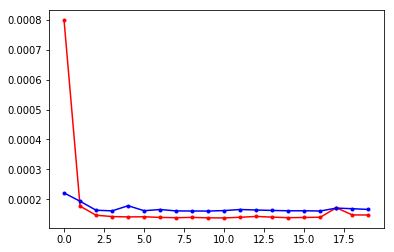

    1-Householder  2-Givens
0        0.000799  0.000221
1        0.000177  0.000193
2        0.000146  0.000163
3        0.000142  0.000161
4        0.000141  0.000178
5        0.000141  0.000161
6        0.000139  0.000165
7        0.000138  0.000161
8        0.000139  0.000160
9        0.000138  0.000160
10       0.000137  0.000162
11       0.000139  0.000165
12       0.000142  0.000164
13       0.000140  0.000162
14       0.000138  0.000161
15       0.000139  0.000161
16       0.000140  0.000160
17       0.000171  0.000170
18       0.000147  0.000168
19       0.000147  0.000166


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import myQR
%matplotlib inline

n=6; # the dimension of matrix A
cycles=20; # the number of tests to be taken
runtime=np.zeros((2,cycles))
for i in range(cycles):
    # test for householder QR, record in runtime[0] 
    A=2*np.random.random((n,n))-1
    t1=time.time()
    (Q,R)=myQR.QR_householder(A,n)
    t2=time.time()
    runtime[0,i]=t2-t1
    # test for givens QR, record in runtime[1]
    A=2*np.random.random((n,n))-1
    t1=time.time()
    (Q,R)=myQR.QR_givens(A,n)
    t2=time.time()
    runtime[1,i]=t2-t1
x=np.arange(cycles)
plt.plot(x,runtime[0,],'r.-',x,runtime[1,],'b.-')
plt.savefig('QR_compare.png')
plt.show()

lst=pd.DataFrame({'1-Householder':runtime[0],'2-Givens':runtime[1]})
print(lst)

## 幂次法求矩阵最大模的本征值和本征矢

> 本题中我们考虑利用幂次法 (power method)来求一个矩阵 $A\in\mathbb{R^{n\times n}}$ 的本征值的问题。同时将它运用到一个具体的实例:一维原子链的振动。  
考虑一个一维的原子链的经典振动问题。假定我们有 $N$ 个原子,每个都具有质量$m$,均匀相间排列在 $x$ 轴上。相邻两个原子间有相同的弹簧 (倔强系数均为$k$) 相连。为了简化讨论我们取 $k/m = 1$。整个原子链上的原子可以在其平衡位置附近做小振动。如果我们将第 $i$ 个原子偏离平衡位置的位移记为 $x_i(t)$,那么这些原子满足的经典运动方程为:  
$$\ddot{x}_i-[x_{i-1}+x_{i+1}-2x_i]=0$$
当然为了明确起见，我们还必须加上合适的边界条件。为了方便我们取周期性边界条件即$x_{i+N}(t)=x_i(t)$，因此,物理上这 $N$ 个粒子实际上是连城一个圆环。于是上述方程可以写为矩阵方程：  
$$\ddot{x}=-A\cdot x$$
其中 A 是一个矩阵，其矩阵元为:$(−A)_{ij}= \delta_{i-1,j} + \delta_{i+1,j} − 2\delta_{ij}$。而 $x(t) =
(x_1(t),\dots, x_N(t))^T \in \mathbb{C}^N$ 则是解矢量。我们将尝试 $x(t) = xe^{−i\omega t}$ 的解从而振幅 $x$ 原则上可以是任意的复矢量，真实的物理的解被认为是这个复矢量解的实部：$x_{phy.} (t) = Re(x(t))$。  

>a) 考虑一个一维的原子链的经典振动解，尝试 $x(t) = xe^{−i\omega t}$ ,说明振幅 $x \in \mathbb{C}^N$ 实际上满足一个本征方程：$A\cdot x = \lambda x$。事实上本征值 $\lambda = \omega^2$。  

>b) 是的，这个题目可以轻易地解析求解。但现在我们假装不知道这点。请写一个利用下面介绍的幂次法求解上述本征值问题的程序。求出体系最大的本征频率的平方$\omega^2$。这对应于最大的 $\lambda$。  
【幂次法】:我们从任意一个单位矢量 $q^{(0)} \in \mathbb{C}^N$ 出发，我们从 $k=1,2,\dots$ 开始构造迭代：  
$$z^{(k)}=A\cdot q^{(k-1)},\,q^{(k)}=z^{(k)}/\|z^{(k)}\|$$
$$\nu^{(k)}=[q^{(k)}]^{\dagger}A q^{(k)}$$
现在假定矩阵 $A$ 是可对角化的，从而它的本征值构成一组完备的基。我们
约定矩阵 $A$ 的本征值排列如下，$\lambda_1 > \lambda_2 \ge\dots \ge \lambda_N$。相应的本征矢记为$v_1,\dots,v_N$。它们可以构成正交归一完备的一组基矢。将初始的矢量 $q^{(0)}$ 按照
本征矢进行展开。证明只要初始的矢量 $q^{(0)}$ 在 $v_1$ 方向的投影不恒等于零,上述的幂次法迭代最终会获得相应的本征值和本征矢,即:  
$$\lim_{k\to\infty}\nu^{(k)}=\lambda_1,\,\lim_{k\to\infty}q^{(k)}=v_1$$
最后，对于 $N=10$ 的情形,利用你的程序给出相应的本征值以及本征矢。

> a) solution  
显然
$$\ddot{x}(t)=\frac{d^2}{dt^2}x(t)=\frac{d^2}{dt^2}\{xe^{-i\omega t}\}=-\omega^2xe^{-i\omega t}=-\omega^2x(t)$$
代入到方程$\ddot{x}(t)=-A\cdot x(t)$，即：  
$$-\omega^2x(t)=-A\cdot x(t)$$
$$-\omega^2xe^{-i\omega t}=-A\cdot xe^{-i\omega t}$$
$$\omega^2 x=A\cdot x$$
这里对应题干的$\lambda=\omega^2$就是显而易见的，即证毕！

> b) solution  
显然，$A$的本征矢量构成一个完备的空间，则$q^{(0)}$可以在这个空间内展开为$q^{(k)}=\sum_{i=1,N}c^k_i v_i$，则按照题目的假设满足条件$c^0_i\ne 0$，考虑递推关系：  
$$\begin{eqnarray}
q^{(k+1)}&=\frac{A\cdot q^{(k)}}{\|A\cdot q^{(k)}\|} 
=\frac{A(\sum_{i=1,N}c^k_i v_i)}{\|A(\sum_{i=1,N}c^k_i v_i)\|} \\
&=\frac{\sum_{i=1,N}\lambda_i c^k_i v_i}{\|\sum_{i=1,N}\lambda_i c^k_i v_i\|}=\sum_{i=1,N}c^{k+1}_i v_i
\end{eqnarray}$$
那么：
$$c^{k+1}_i=\frac{\lambda_i c^k_i}{\|\sum_{i=1,N}\lambda_i c^k_i v_i\|}$$
即：
$$\frac{c^{k+1}_i/c^{k}_i}{c^{k+1}_j/c^{k}_j}=\frac{\lambda_i}{\lambda_j}$$
推广得：  
$$\frac{c^{k}_i/c^{0}_i}{c^{k}_j/c^{0}_j}=(\frac{\lambda_i}{\lambda_j})^k$$
即因为$\lambda_1$是最大的，对于$\lambda_i < \lambda_1$则有：
$$\lim_{k\to\infty}\frac{c^{k}_i}{c^{k}_1}=\lim_{k\to\infty}\frac{c^{0}_i}{c^{0}_1}(\frac{\lambda_i}{\lambda_1})^k=0$$
又根据$\{v_i\}$正交归一的条件，$q^{(k)}$始终作为单位矢量，其投影系数的平方和是恒为1的：  
$$\sum_i(c^k_i)^2=1$$
所以：
$$\begin{eqnarray}
\lim_{k\to\infty}\sum_i(c^k_i)^2/(c^k_1)^2=\lim_{k\to\infty}1/(c^k_1)^2 \\
\lim_{k\to\infty}\sum_i(c^k_i/c^k_1)^2=\lim_{k\to\infty}1/(c^k_1)^2 \\
1+0+0+\dots+0=\lim_{k\to\infty}1/(c^k_1)^2
\end{eqnarray}$$
即要求关系：
$$c^{\infty}_1=\pm 1,\,\,c^{\infty}_{i\ne1}=0$$
即$\lim_{k\to\infty}q^{(k)}=\pm v_1$，因为正交归一的本征矢的方向有一定的任意性，我们规定选取$v_1$与$q^{(\infty)}$同向即可(即初始的$q^{(0)}$在$v_1$上的投影为正值，投影量随迭代逐渐放大！如果$q^{(0)}$在$v_1$上的投影为负值，是有负号的)。  
因为$\lim_{k\to\infty}q^{(k)}=\pm v_1$：
$$\lim_{k\to\infty}\nu^{(k)}=\lim_{k\to\infty}[q^{(k)}]^{\dagger}A q^{(k)}=(\pm)^2 (v_1)^{\dagger}Av_1=\lambda_1(v_1)^{\dagger}v_1=\lambda_1$$
综上，证毕。  
数值结果如下;

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

N=10
q=np.random.random(N) # generate a random vector as q^0
# initial of matrix A
A=np.zeros((N,N))
for i in range(N):
    A[i,i]=2;A[i,(i-1+N)%N]=-1;A[i,(i+1)%N]=-1
print(A)

qbefore=np.zeros(N)
for i in range(1000):
    z=np.dot(A,q)
    q=z/np.sqrt(np.dot(z,z))
    if(np.dot(q-qbefore,q-qbefore)<10e-20): # check the convergence
        print('the step of diffience of vec-norm converging to 10e-20 is:',i)
        break
    qbefore=q.copy()
lbd=np.dot(q,np.dot(A,q)) # we needn't lbd for iternation, so write it out of the cycle-body
print('the vector is:\n',q,'\nthe max-eigenvalue is:\n',lbd)

[[ 2. -1.  0.  0.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.]
 [-1.  0.  0.  0.  0.  0.  0.  0. -1.  2.]]
the step of diffience of vec-norm converging to 10e-20 is: 191
the vector is:
 [-0.31622777  0.31622777 -0.31622777  0.31622777 -0.31622776  0.31622776
 -0.31622777  0.31622777 -0.31622777  0.31622777] 
the max-eigenvalue is:
 4.0


> 这与解析的结果相同：  
对于这种循环矩阵，可以借助范特蒙德矩阵进行计算(其实也就是所谓的FFT)，这里不加证明地列述结论(也不是题目要求)，对于：  
$$A=\begin{pmatrix}
\alpha & \beta & 0 & \dots & \beta \\
\beta & \alpha & \beta & \dots & 0 \\
\dots & \dots & \dots & \dots & \dots \\
\beta & 0 & 0 & \dots & \alpha
\end{pmatrix}$$
其本征值和本征矢量分别为：
$$\begin{eqnarray}
\lambda_j&=&\alpha+2\beta \cos{\frac{2j\pi}{N}} \\
(q_j)_k&=&\frac{1}{\sqrt{N}}\exp\{\frac{2\pi i j(k-1)}{N}\}
\end{eqnarray}$$
这与结果最大本征值对应的$\lambda_j=4$ (当$j=N/2=5时$) 以及其本征矢量 $q_j=\frac{1}{\sqrt{10}}(1,-1,1,-1,1,-1,1,-1,1,-1)$是完全对应的！